<a href="https://colab.research.google.com/github/crjohnson09/SEIS764/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colton Johnson <br>
SEIS 764-02

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/crjohnson09/SEIS764/main/insurance%20(1).csv"
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [ ]:
# from google.colab import drive
# drive.mount("/content/gdrive")
# path = "gdrive/MyDrive/AI Class/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# df = pd.read_csv(path+"insurance.csv")

1) Load the dataset and print how many data instances and columns we have. 

In [ ]:
df.shape

(1338, 7)

2) Print if there are any missing values in any of the columns.

In [ ]:
df[df.isna().any(axis=1)]

,age,sex,bmi,children,smoker,region,charges



3) Print any duplicate rows and delete them if they are available. 

In [ ]:
print(df[df.duplicated()])
## appears to be 581
df =df[~df.duplicated(keep='last')].reset_index(drop=True)
df.shape

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


(1337, 7)

3B) Get Dummies

In [ ]:
cata=df.select_dtypes("object")
dummies = pd.get_dummies(cata,drop_first=True) # first class is also dropped

df = pd.concat([df,dummies], axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


4) Split the data into the features (i.e. X) and the target (i.e. y). Print first few rows of X and y.  

In [ ]:
y = df.pop("charges")
X = df[df.columns.difference(["sex","smoker","region"])]
X.head()

,age,bmi,children,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.900,0,0,0,1,0,1
1,18,33.770,1,0,1,0,1,0
2,28,33.000,3,0,1,0,1,0
3,33,22.705,0,1,0,0,1,0
4,32,28.880,0,1,0,0,1,0


In [ ]:
y[:5]

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

5) Split the dataset into training (70%) and testing (validation) set (30%). Perform normalization of the data using 
standardization.   

In [ ]:
data=X.select_dtypes(["int","float"])
data.head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [ ]:
# normalized_df=(data-data.mean())/data.std()

In [ ]:
# for i in normalized_df.columns:
#   X.loc[:,i+"-normalized"] = normalized_df[i]
# X.head()

In [ ]:
# #normalize first
from sklearn.preprocessing import StandardScaler
X_normalized = pd.DataFrame(StandardScaler().fit_transform(X.select_dtypes(["int","float"])),columns=["age-norm","bmi-norm","children-norm"])
X = pd.concat([X,X_normalized],axis=1)
X=X.iloc[:,3:]
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# from sklearn.preprocessing import StandardScaler
# X_normalized = pd.DataFrame(StandardScaler().fit_transform(X_train.select_dtypes(["int","float"])),columns=["age-norm","bmi-norm","children-norm"])
# print(X_normalized.shape)
# X_train = pd.concat([X_train,X_normalized],axis=1)
# print(X_train.shape)
# X_train=X_train.iloc[:,3:]


In [ ]:
X_train.head(2)

,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes,age-norm,bmi-norm,children-norm
520,0,1,0,0,0,-0.514431,2.223046,-0.909234
575,0,1,0,1,0,-1.226729,-0.626982,-0.909234


In [ ]:
X_test.head(2)

,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes,age-norm,bmi-norm,children-norm
628,1,0,0,0,1,0.340326,1.358854,-0.909234
1086,1,0,0,1,0,1.266312,0.143739,-0.909234


In [ ]:
y_train.head(2)

520    3994.1778
575    1664.9996
Name: charges, dtype: float64

In [ ]:
y_test.head(2)

628     42983.4585
1086    11353.2276
Name: charges, dtype: float64

6) Print how many data instances and columns we have in the train set. 

In [ ]:
X_train.shape

(935, 8)

In [ ]:
X_train.head(2)

,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes,age-norm,bmi-norm,children-norm
520,0,1,0,0,0,-0.514431,2.223046,-0.909234
575,0,1,0,1,0,-1.226729,-0.626982,-0.909234


7) Build a simple NN Regression model that has 64 Dense units. Specify mean_squared_error for the loss and
adam for optimizer. Run it for 100 epochs. Plot the loss plot for training and validation. You can do that like this:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)


In [ ]:
#model design
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, input_shape=(8,), activation='relu'),
  tf.keras.layers.Dense(1)
])
#define opt and loss
opt =tf.keras.optimizers.Adam(0.01)
model1.compile(optimizer=opt, loss='mean_squared_error')

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
r1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

In [ ]:
model1.get_weights()[0][0]

array([ 1.7023208 ,  1.5333183 ,  1.513967  ,  1.8059725 , -0.17226711,
        1.4852113 , -0.13166764, -0.31305656,  1.4483279 ,  1.5223632 ,
        1.3155401 , -0.23318152,  1.302518  , -0.24777246,  1.6253017 ,
        1.4991511 ,  1.494666  ,  1.772419  ,  1.5817653 ,  1.6388117 ,
        1.4868451 ,  1.6249537 , -0.06564999,  1.5083386 ,  1.985497  ,
        0.07670653,  1.7702634 ,  1.6241428 ,  1.7174355 ,  1.9526999 ,
        2.0099883 ,  1.9029909 , -0.00446327,  1.6541427 ,  1.6177073 ,
        1.5769987 ,  1.3348517 , -0.04191799,  1.4651186 ,  2.0075402 ,
        1.7655609 ,  1.5379809 , -0.2710033 ,  2.046784  , -0.18844134,
        1.7070023 ,  1.7280054 ,  1.766708  , -0.28226468,  1.7123703 ,
        1.7524661 , -0.13051645, -0.26940528,  1.6634051 ,  1.5365089 ,
       -0.14769885,  1.71754   ,  1.8577532 ,  1.552037  ,  1.5898418 ,
        1.5681212 ,  2.0854833 ,  1.9874493 ,  1.8556714 ], dtype=float32)

[39669788.0, 39445896.0]
###


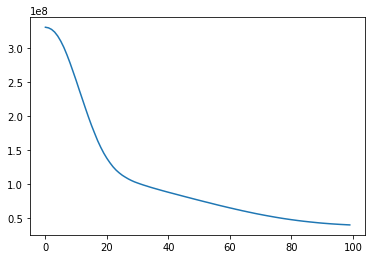

In [ ]:
print(r1.history['loss'][-2:])
print("###")
plt.plot(r1.history['loss'])

[39669788.0, 39445896.0]
###


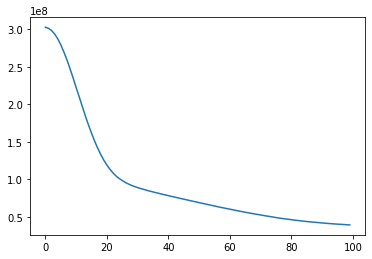

In [ ]:
print(r1.history['loss'][-2:])
print("###")
plt.plot(r1.history['val_loss'])

In [ ]:
print(" X-",X_test.loc[628], ";\n\n Y-", y_test.loc[628])
print("####")
print((model1.predict(np.array( [X_test.loc[628],] ) )))


 X- region_northwest    1.000000
region_southeast    0.000000
region_southwest    0.000000
sex_male            0.000000
smoker_yes          1.000000
age-norm            0.340326
bmi-norm            1.358854
children-norm      -0.909234
Name: 628, dtype: float64 ;

 Y- 42983.4585
####
[[33745.25]]


9) Next, change the optimizer to sgd. Run it for 100 epochs. Plot the loss plot for training and validation.

In [ ]:
#model design
model2 = tf.keras.models.Sequential([
  # I couldnt get it to work without this layer, half the weights would be nan so likely gradient blow up.
  # Even then, I had to run it many times to get the right initial values for it to work
  # tf.keras.layers.Dense(8, input_shape=(8,),activation='relu'), 
  # tf.keras.layers.Dense(64, activation='relu'),

  tf.keras.layers.Dense(64, input_shape=(8,), activation='relu'),
  tf.keras.layers.Dense(1)
])
#define opt and loss
opt =tf.keras.optimizers.SGD(learning_rate=0.1,momentum= 0.9)
model2.compile(optimizer=opt, loss='mean_squared_error')

In [ ]:
model2.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 64)                576       
                                                                 
 dense_57 (Dense)            (None, 1)                 65        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
r2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0,batch_size=32)

In [ ]:
model2.get_weights()

[array([[           nan,            nan,            nan,            nan,
                    nan,            nan,            nan,            nan,
                    nan,            nan,            nan,            nan,
         -1.9611876e+07,            nan,            nan, -1.3032688e+08,
                    nan,            nan,            nan,            nan,
                    nan, -1.6194678e+03,            nan,            nan,
                    nan,            nan,            nan,            nan,
         -1.0013488e+02,            nan,            nan,            nan,
                    nan,            nan, -6.2910317e+08,            nan,
                    nan,            nan,            nan,            nan,
                    nan, -8.1333795e+02,            nan,            nan,
                    nan,            nan,            nan,            nan,
                    nan,            nan,            nan,            nan,
                    nan,            nan,           

[151192864.0, 149985040.0]
###


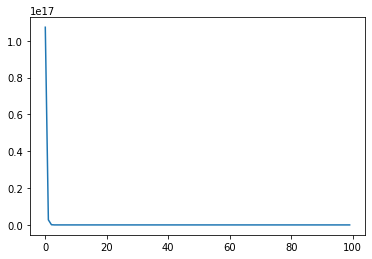

In [ ]:
print(r2.history['loss'][-2:])
print("###")
plt.plot(r2.history['loss'])

[4.3362934693463336e+26, 4.3362934693463336e+26]
###


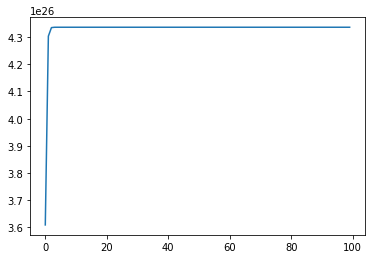

In [ ]:
print(r2.history['val_loss'][-2:])
print("###")
plt.plot(r2.history['val_loss'])

In [ ]:
print(" X-",X_test.loc[628], ";\n\n Y-", y_test.loc[628])
print("####")
print((model2.predict(np.array( [X_test.loc[628],] ) )))


 X- region_northwest    1.000000
region_southeast    0.000000
region_southwest    0.000000
sex_male            0.000000
smoker_yes          1.000000
age-norm            0.340326
bmi-norm            1.358854
children-norm      -0.909234
Name: 628, dtype: float64 ;

 Y- 42983.4585
####
[[13478.798]]


9) Now, change the optimizer to rmsprop. Run it for 100 epochs. Plot the loss plot for training and validation.

In [ ]:
#model design
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, input_shape=(8,), activation='relu'),
  tf.keras.layers.Dense(1)
])
#define opt and loss
opt =tf.keras.optimizers.RMSprop(0.01)
model3.compile(optimizer=opt, loss='mean_squared_error')

In [ ]:
model3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 64)                576       
                                                                 
 dense_47 (Dense)            (None, 1)                 65        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
r3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

In [ ]:
model3.get_weights()[0][0]

array([ 4.6559814e-02,  1.6777084e+00, -1.9643536e-01,  1.5279758e+00,
        6.0601924e-02, -1.6978696e-01,  1.7674133e+00,  1.7609310e+00,
        1.3018913e+00,  1.5327150e+00,  2.3998623e-04,  1.1485197e-02,
        1.1878381e+00,  1.5574250e+00,  8.4296346e-01,  1.3053730e+00,
        7.4398048e-02,  1.5938640e+00,  1.5122708e+00,  1.4884626e+00,
        1.5255764e+00,  1.6681445e+00,  1.6110206e+00,  1.3275884e+00,
        1.6848332e+00,  7.3457909e-01,  1.5439126e+00,  1.0798770e+00,
        1.5026824e+00,  1.5010284e+00,  1.8088052e+00,  1.1194782e+00,
        8.2932663e-01,  2.9336372e-02,  1.6209465e+00,  1.6117566e+00,
        1.7476996e+00,  1.4558210e+00,  1.5317874e+00,  1.8116828e+00,
        1.2325934e+00, -1.8548508e-01, -1.9135979e-01,  6.6897392e-02,
       -3.5674747e-02, -1.9344005e-01,  1.6246530e+00,  1.1794666e+00,
        1.6847032e+00,  1.1896693e+00,  1.4229215e+00,  9.8479562e-02,
        1.5142934e+00,  1.1298213e+00, -9.3238793e-02,  1.2677225e+00,
      

[38755220.0, 38557068.0]
###


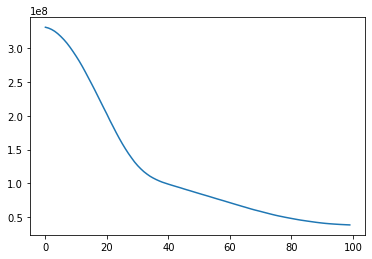

In [ ]:
print(r3.history['loss'][-2:])
print("###")
plt.plot(r3.history['loss'])

[38164240.0, 37999072.0]
###


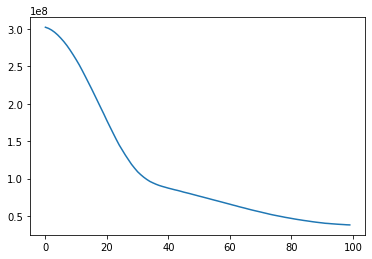

In [ ]:
print(r3.history['val_loss'][-2:])
print("###")
plt.plot(r3.history['val_loss'])

In [ ]:
print(" X-",X_test.loc[628], ";\n\n Y-", y_test.loc[628])
print("####")
print((model3.predict(np.array( [X_test.loc[628],] ) )))


 X- region_northwest    1.000000
region_southeast    0.000000
region_southwest    0.000000
sex_male            0.000000
smoker_yes          1.000000
age-norm            0.340326
bmi-norm            1.358854
children-norm      -0.909234
Name: 628, dtype: float64 ;

 Y- 42983.4585
####
[[34577.47]]


10)  Which network performed the best? Do you have ideas on how the performance can be improved? Answer this 
question in the markdown cell in the notebook.  

Based on the r2score I've created below, it appears Adam is the best network. However, this switches with the Adam optimizer each time I run the notebook, so the reuslts are very close between those models. The SGD does not appear to perform well at all, producing a negative r2score.

Improvements:
*   Because the results vary strongly each run, it is unlikely we have trained enough to remove the error caused by the random state of the intital nodes. It is unlikely we have reached a true bottom of loss or convergence with our 100 epochs.
*   In a similar suggestion, we can adjust the learning rate (maybe even a scheduler) and modify the momentum for SGD.
*   The network's middle layer of 64 nodes is rather abritary and likely doesn't conform to any representitive products or robust metrics. In other words, we are unlikely creating things like "School Quality" from Zipcode and Wealth. We're most likely creating just noise. So, a better configuration of layers and nodes would help.





In [ ]:
from sklearn.metrics import r2_score

y_true = np.array( [y_test] )

In [ ]:
y_pred = model1.predict(X_test)
y_pred = [num for sublist in y_pred for num in sublist]
r2_score(y_true[0], y_pred)

0.72929369881574

In [ ]:
y_pred = model2.predict(X_test)
y_pred = [num for sublist in y_pred for num in sublist]
r2_score(y_true[0], y_pred)

-3.0068919949716127e+18

In [ ]:
y_pred = model3.predict(X_test)
y_pred = [num for sublist in y_pred for num in sublist]
r2_score(y_true[0], y_pred)

0.7365051384490284

In [ ]:
%%shell
jupyter nbconvert "/content/Assignment2copy.ipynb"

[NbConvertApp] Converting notebook /content/Assignment2copy.ipynb to html
[NbConvertApp] Writing 434920 bytes to /content/Assignment2copy.html
